## Ï∫êÍ∏Ä Í≤ΩÏßÑÎåÄÌöå Îî∞ÎùºÌï¥Î≥¥Í∏∞

#### ÌïôÏäµÎ™©Ìëú
* Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïù¥Ïñ∏Ïä§ Í¥ÄÎ†® ÏµúÎåÄ Ïª§ÎÆ§ÎãàÌã∞Ïù∏ Ï∫êÍ∏ÄÏùò Í≤ΩÏßÑÎåÄÌöåÏóê ÏßÅÏ†ë Ï∞∏Ïó¨Ìï¥ÏÑú Î¨∏Ï†úÎ•º Ìï¥Í≤∞Ìï¥Î≥∏Îã§.
* Ï∫êÍ∏ÄÏóêÏÑú Îç∞Ïù¥ÌÑ∞Î•º ÎÇ¥Î†§Î∞õÎäî Í≤ÉÏúºÎ°úÎ∂ÄÌÑ∞ ÏãúÏûëÌï¥ÏÑú, Î°úÏª¨ ÏÑúÎ≤ÑÏóêÏÑú ÏûêÏú†Î°≠Í≤å Îã§Î£®Ïñ¥Î≥¥Î©∞ Î¨∏Ï†ú Ìï¥Í≤∞ÏùÑ ÏúÑÌïú Í≥†ÎØºÏùÑ Ìï¥Î≥∏Îã§.
* ÏïôÏÉÅÎ∏î Í∏∞Î≤ïÏùò Í∞úÎÖêÍ≥º Í∞ïÏ†êÏùÑ Ïù¥Ìï¥ÌïòÍ≥†, Ïó¨Îü¨ Î™®Îç∏Ïùò ÏòàÏ∏° Í≤∞Í≥ºÎ•º Averaging Ìïú ÏµúÏ¢Ö Í≤∞Í≥ºÎ°ú Ï∫êÍ∏ÄÏóê Ï†úÏ∂úÌï¥Î≥∏Îã§.
* ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãùÏùò ÌïÑÏöîÏÑ±Í≥º ÏùòÎØ∏Î•º Ïù¥Ìï¥ÌïòÍ≥†, Grid Search, Random Search Îì±Ïùò Í∏∞Î≤ïÏùÑ ÏïåÏïÑÎ≥∏Îã§.
* Grid Search Í∏∞Î≤ïÏùÑ ÌôúÏö©Ìï¥ÏÑú ÏßÅÏ†ë ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù Ïã§ÌóòÏùÑ Ìï¥Î≥¥Í≥†, Î™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ ÏµúÎåÄÌïú ÎÅåÏñ¥Ïò¨Î†§Î≥∏Îã§.

#### Ï§ÄÎπÑÎ¨º

* `xgboost`, `lightgbm`, `missingno`

### baseline Î™®Îç∏

baseline : Î¨∏Ï†úÌï¥Í≤∞ÏùÑ ÏãúÏûëÌï† Îïå ÏâΩÍ≤å ÏÇ¨Ïö©Ìï¥Î≥º Ïàò ÏûàÎäî ÏÉòÌîå

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import missingno as msno

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

import matplotlib.pyplot as plt
import seaborn as sns

print('Ïñç')

Ïñç


In [2]:
train_df_train_path = 'C:/project/aiffel_exp/exp5_kaggle/train.csv'
df_test_df_train_path = 'C:/project/aiffel_exp/exp5_kaggle/test.csv'

print(train_df_train_path)
print(df_test_df_train_path)

C:/project/aiffel_exp/exp5_kaggle/train.csv
C:/project/aiffel_exp/exp5_kaggle/test.csv


### 1. Îç∞Ïù¥ÌÑ∞ ÏÇ¥Ìé¥Î≥¥Í∏∞
pandasÏùò read_csv Ìï®ÏàòÎ•º ÏÇ¨Ïö©Ìï¥ Îç∞Ïù¥ÌÑ∞Î•º ÏùΩÏñ¥Ïò§Í≥†, Í∞Å Î≥ÄÏàòÎì§Ïù¥ ÎÇòÌÉÄÎÇ¥Îäî ÏùòÎØ∏Î•º ÏÇ¥Ìé¥Î≥¥Í≤†ÏäµÎãàÎã§.
1. ID : ÏßëÏùÑ Íµ¨Î∂ÑÌïòÎäî Î≤àÌò∏
2. date : ÏßëÏùÑ Íµ¨Îß§Ìïú ÎÇ†Ïßú
3. price : ÌÉÄÍ≤ü Î≥ÄÏàòÏù∏ ÏßëÏùò Í∞ÄÍ≤©
4. bedrooms : Ïπ®Ïã§Ïùò Ïàò
5. bathrooms : Ïπ®Ïã§Îãπ ÌôîÏû•Ïã§ Í∞úÏàò
6. sqft_living : Ï£ºÍ±∞ Í≥µÍ∞ÑÏùò ÌèâÎ∞© ÌîºÌä∏
7. sqft_lot : Î∂ÄÏßÄÏùò ÌèâÎ∞© ÌîºÌä∏
8. floors : ÏßëÏùò Ï∏µ Ïàò
9. waterfront : ÏßëÏùò Ï†ÑÎ∞©Ïóê Í∞ïÏù¥ ÌùêÎ•¥ÎäîÏßÄ Ïú†Î¨¥ (a.k.a. Î¶¨Î≤ÑÎ∑∞)
10. view : ÏßëÏù¥ ÏñºÎßàÎÇò Ï¢ãÏïÑ Î≥¥Ïù¥ÎäîÏßÄÏùò Ï†ïÎèÑ
11. condition : ÏßëÏùò Ï†ÑÎ∞òÏ†ÅÏù∏ ÏÉÅÌÉú
12. grade : King County grading ÏãúÏä§ÌÖú Í∏∞Ï§ÄÏúºÎ°ú Îß§Í∏¥ ÏßëÏùò Îì±Í∏â
13. sqft_above : ÏßÄÌïòÏã§ÏùÑ Ï†úÏô∏Ìïú ÌèâÎ∞© ÌîºÌä∏
14. sqft_basement : ÏßÄÌïòÏã§Ïùò ÌèâÎ∞© ÌîºÌä∏
15. yr_built : ÏßëÏùÑ ÏßÄÏùÄ ÎÖÑÎèÑ
16. yr_renovated : ÏßëÏùÑ Ïû¨Í±¥Ï∂ïÌïú ÎÖÑÎèÑ
17. zipcode : Ïö∞Ìé∏Î≤àÌò∏
18. lat : ÏúÑÎèÑ
19. long : Í≤ΩÎèÑ
20. sqft_living15 : 2015ÎÖÑ Í∏∞Ï§Ä Ï£ºÍ±∞ Í≥µÍ∞ÑÏùò ÌèâÎ∞© ÌîºÌä∏(ÏßëÏùÑ Ïû¨Í±¥Ï∂ïÌñàÎã§Î©¥, Î≥ÄÌôîÍ∞Ä ÏûàÏùÑ Ïàò ÏûàÏùå)
21. sqft_lot15 : 2015ÎÖÑ Í∏∞Ï§Ä Î∂ÄÏßÄÏùò ÌèâÎ∞© ÌîºÌä∏(ÏßëÏùÑ Ïû¨Í±¥Ï∂ïÌñàÎã§Î©¥, Î≥ÄÌôîÍ∞Ä ÏûàÏùÑ Ïàò ÏûàÏùå)

In [10]:
df_train = pd.read_csv(train_df_train_path)
df_test = pd.read_csv(df_test_df_train_path)
print('train df_train dim : {}'.format(df_train.shape))
print('df_test df_train dim : {}'.format(df_test.shape))

train data dim : (15035, 21)
sub data dim : (6555, 20)


In [11]:
y = df_train['price']
del df_train['price']

print(df_train.columns)

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [14]:
train_len = len(df_train)
df_train = pd.concat((df_train, df_test), axis=0)

print(len(df_train))

21590


<AxesSubplot:>

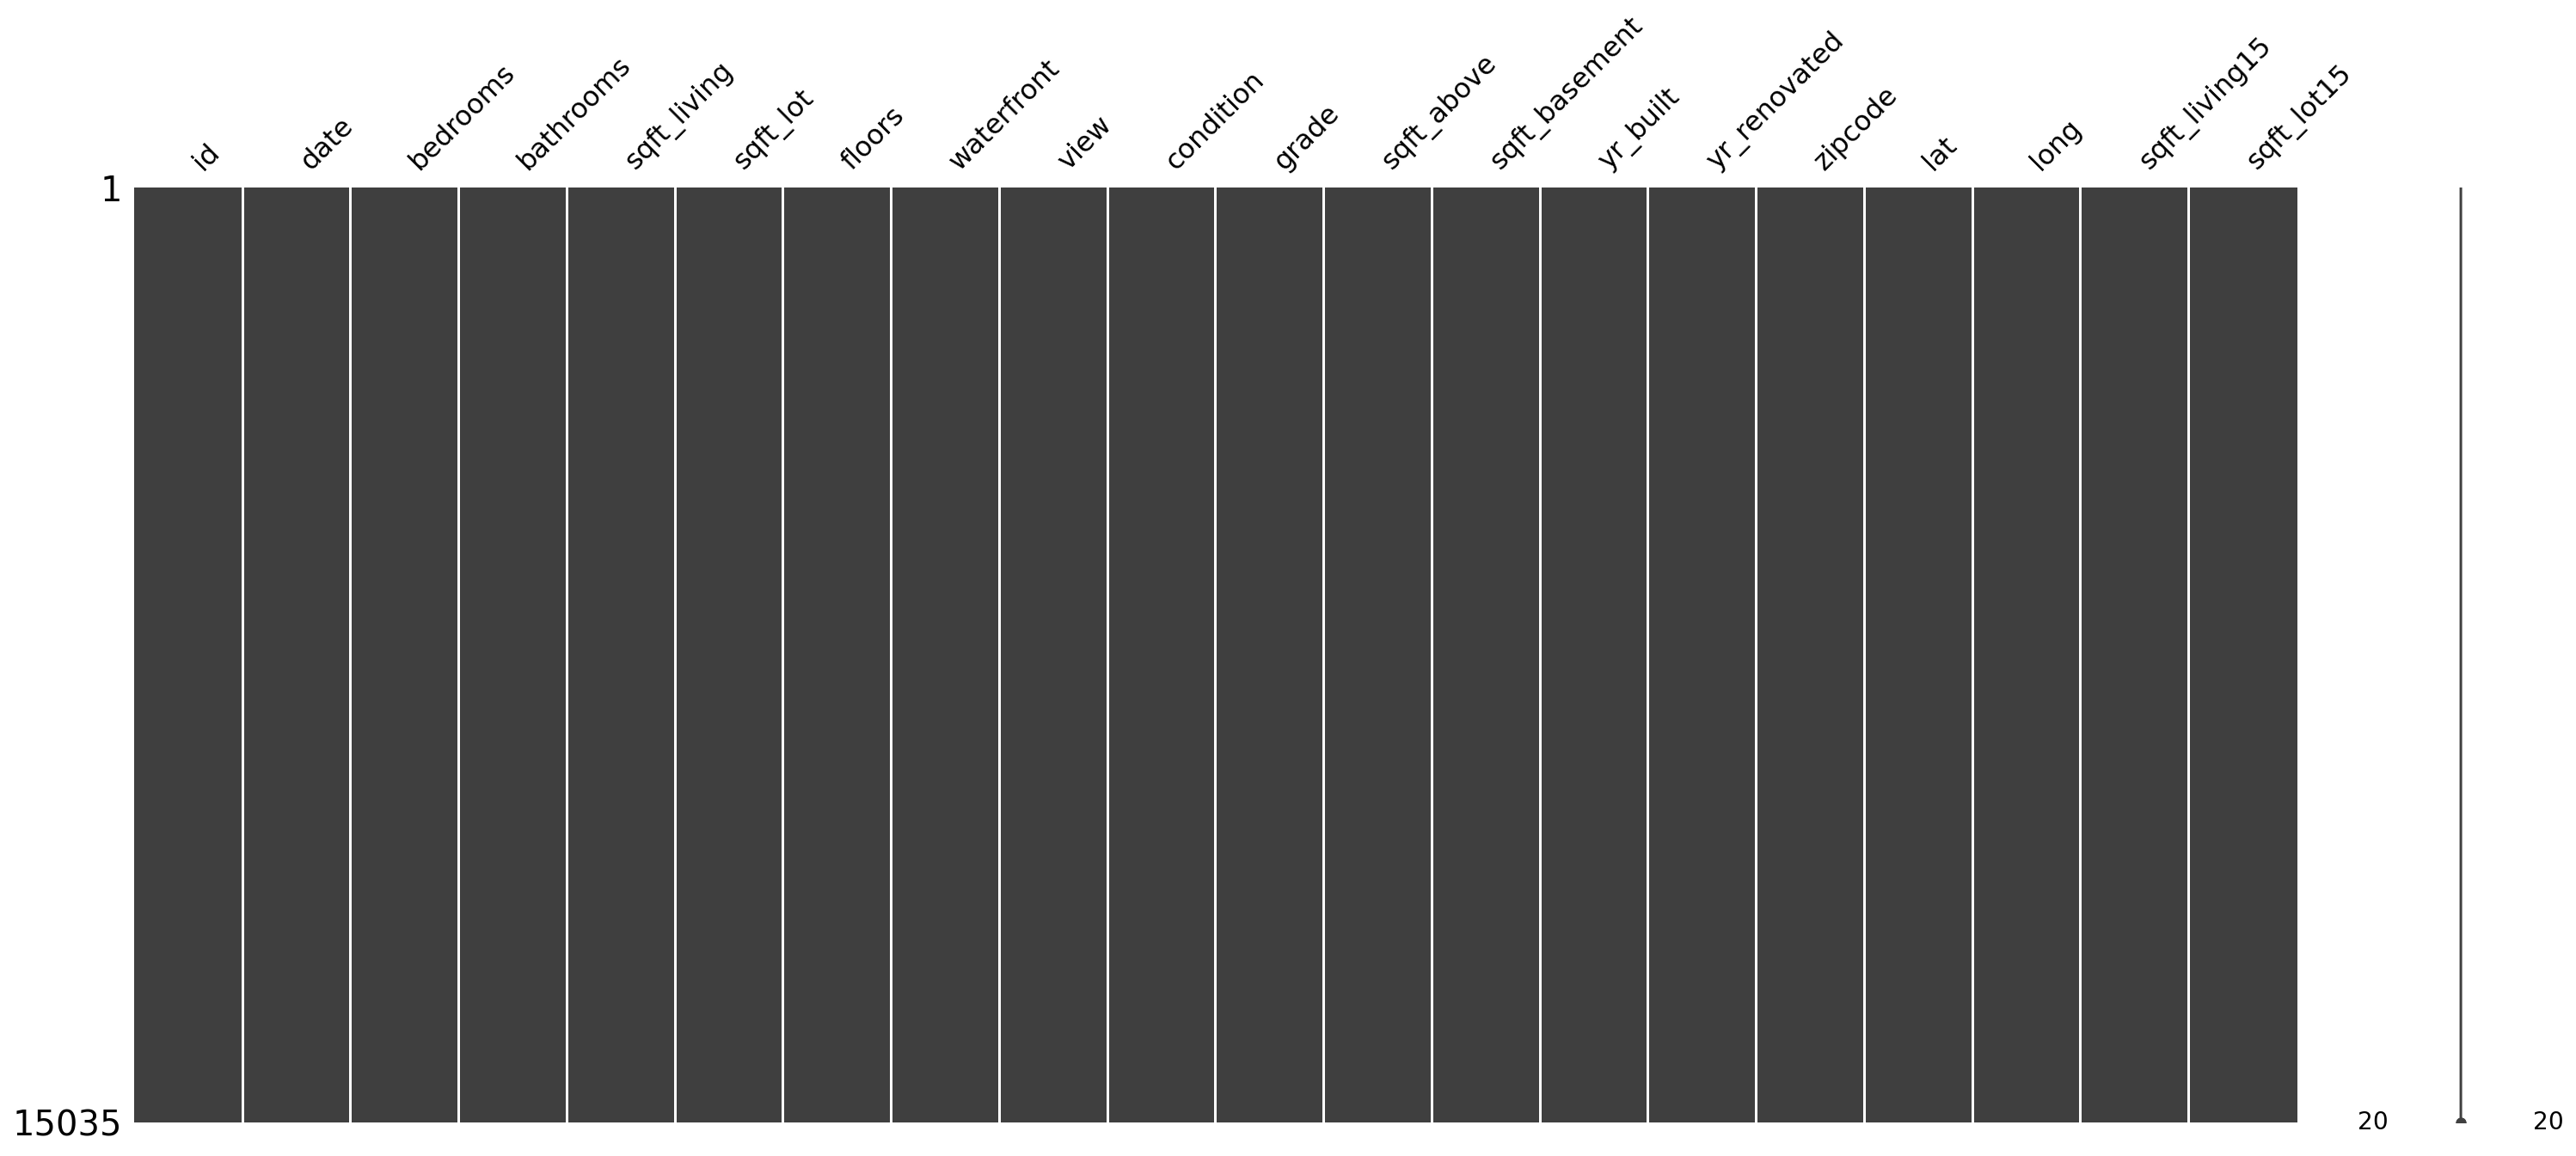

In [13]:
msno.matrix(df_train)

In [15]:
# 1. id Ïª¨ÎüºÏù¥ Í≤∞Ï∏°ÏπòÏù∏ÏßÄ ÌôïÏù∏Ìï©ÎãàÎã§.
null_check = pd.isnull(df_train['id'])
print(null_check)

0       False
1       False
2       False
3       False
4       False
        ...  
6550    False
6551    False
6552    False
6553    False
6554    False
Name: id, Length: 21590, dtype: bool


In [16]:
# 2. Í≤∞Ï∏°ÏπòÏù∏ Îç∞Ïù¥ÌÑ∞Îßå ÎΩëÏïÑÎÉÖÎãàÎã§.
null_df_train = df_train.loc[null_check, 'id']
null_df_train.head()

Series([], Name: id, dtype: int64)

In [17]:
# 3. Í≤∞Ï∏°ÏπòÏù∏ Îç∞Ïù¥ÌÑ∞Ïùò Í∞úÏàòÎ•º ÏÖâÎãàÎã§.
print('{}: {}'.format('id', len(null_df_train.values)))

id: 0


In [18]:
# Ìïú Î≤àÏóê ÎøÖ!
print('{} : {}'.format('id', len(df_train.loc[pd.isnull(df_train['id']), 'id'].values)))

id : 0


In [19]:
for c in df_train.columns:
    print('{} : {}'.format(c, len(df_train.loc[pd.isnull(df_train[c]), c].values)))

id : 0
date : 0
bedrooms : 0
bathrooms : 0
sqft_living : 0
sqft_lot : 0
floors : 0
waterfront : 0
view : 0
condition : 0
grade : 0
sqft_above : 0
sqft_basement : 0
yr_built : 0
yr_renovated : 0
zipcode : 0
lat : 0
long : 0
sqft_living15 : 0
sqft_lot15 : 0


In [14]:
df_test_id = df_train['id'][train_len:]
del df_train['id']

print(df_train.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [16]:
'str(x[:6]) ÏúºÎ°ú Ï≤òÎ¶¨Ìïú Í≤ÉÏùÄ 20141013T000000 ÌòïÏãùÏùò Îç∞Ïù¥ÌÑ∞Î•º Ïó∞/Ïõî Îç∞Ïù¥ÌÑ∞Îßå ÏÇ¨Ïö©ÌïòÍ∏∞ ÏúÑÌï¥ 201410ÍπåÏßÄ ÏûêÎ•¥Í∏∞ ÏúÑÌïú Í≤É'
df_train['date'] = df_train['date'].apply(lambda x : str(x[:6])) 

df_train.head()

date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  201410         3       1.00         1180      5650     1.0           0   
1  201502         2       1.00          770     10000     1.0           0   
2  201502         3       2.00         1680      8080     1.0           0   
3  201406         3       2.25         1715      6819     2.0           0   
4  201501         3       1.50         1060      9711     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      6         770              0      1933             0   
2     0          3      8        1680              0      1987             0   
3     0          3      7        1715              0      1995             0   
4     0          3      7        1060              0      1963             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98178  47.5112 -122.257           1340        5650  
1    98028  47.7379 -122.233           2720        8062  
2    98074  47.6168 -122.045           1800        7503  
3    98003  47.3097 -122.327           2238        6819  
4    98198  47.4095 -122.315           1650        9711

#### Í∞Å Î≥ÄÏàòÎì§Ïùò Î∂ÑÌè¨ ÌôïÏù∏
Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Îì§Ïùò Î∂ÑÌè¨Î•º ÌôïÏù∏Ìï©ÎãàÎã§.
ÌäπÌûà ÎÑàÎ¨¥ ÏπòÏö∞Ïπú Î∂ÑÌè¨Î•º Í∞ÄÏßÄÎäî Ïª¨ÎüºÏùò Í≤ΩÏö∞ Î™®Îç∏Ïù¥ Í≤∞Í≥ºÎ•º ÏòàÏ∏°ÌïòÎäî Îç∞Ïóê Ï¢ãÏßÄ ÏïäÏùÄ ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎØÄÎ°ú Îã§Îì¨Îäî ÏûëÏóÖÏùÑ Ìï©ÎãàÎã§.

ÏïÑÎûò ÏãúÍ∞ÅÌôî ÏΩîÎìúÎ•º ÌÜµÌï¥ id Ïª¨ÎüºÏùÑ Ï†úÏô∏Ìïú 19Í∞ú Ïª¨ÎüºÏóê ÎåÄÌï¥ Ìïú Î≤àÏóê Î™®Îì† Í∑∏ÎûòÌîÑÎ•º Í∑∏Î†§Ï§çÎãàÎã§.
10Ìñâ 2Ïó¥Ïùò df_testplotÏóê Í∑∏ÎûòÌîÑÎ•º Í∑∏Î¶¨Í∏∞ ÏúÑÌï¥ 2Ï§ë forÎ¨∏ÏùÑ ÏÇ¨Ïö©ÌïòÍ≥† ÏûàÍµ∞Ïöî.

Í∑∏ÎûòÌîÑÏùò Ï¢ÖÎ•òÎäî sns.kdeplotÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.
kdeplotÏùÄ Ïù¥ÏÇ∞(discrete) Îç∞Ïù¥ÌÑ∞Ïùò Í≤ΩÏö∞ÏóêÎèÑ Î∂ÄÎìúÎü¨Ïö¥ Í≥°ÏÑ†ÏúºÎ°ú Ï†ÑÏ≤¥ Î∂ÑÌè¨Î•º ÌôïÏù∏Ìï† Ïàò ÏûàÎèÑÎ°ù ÌïòÎäî ÏãúÍ∞ÅÌôî Ìï®ÏàòÏûÖÎãàÎã§.

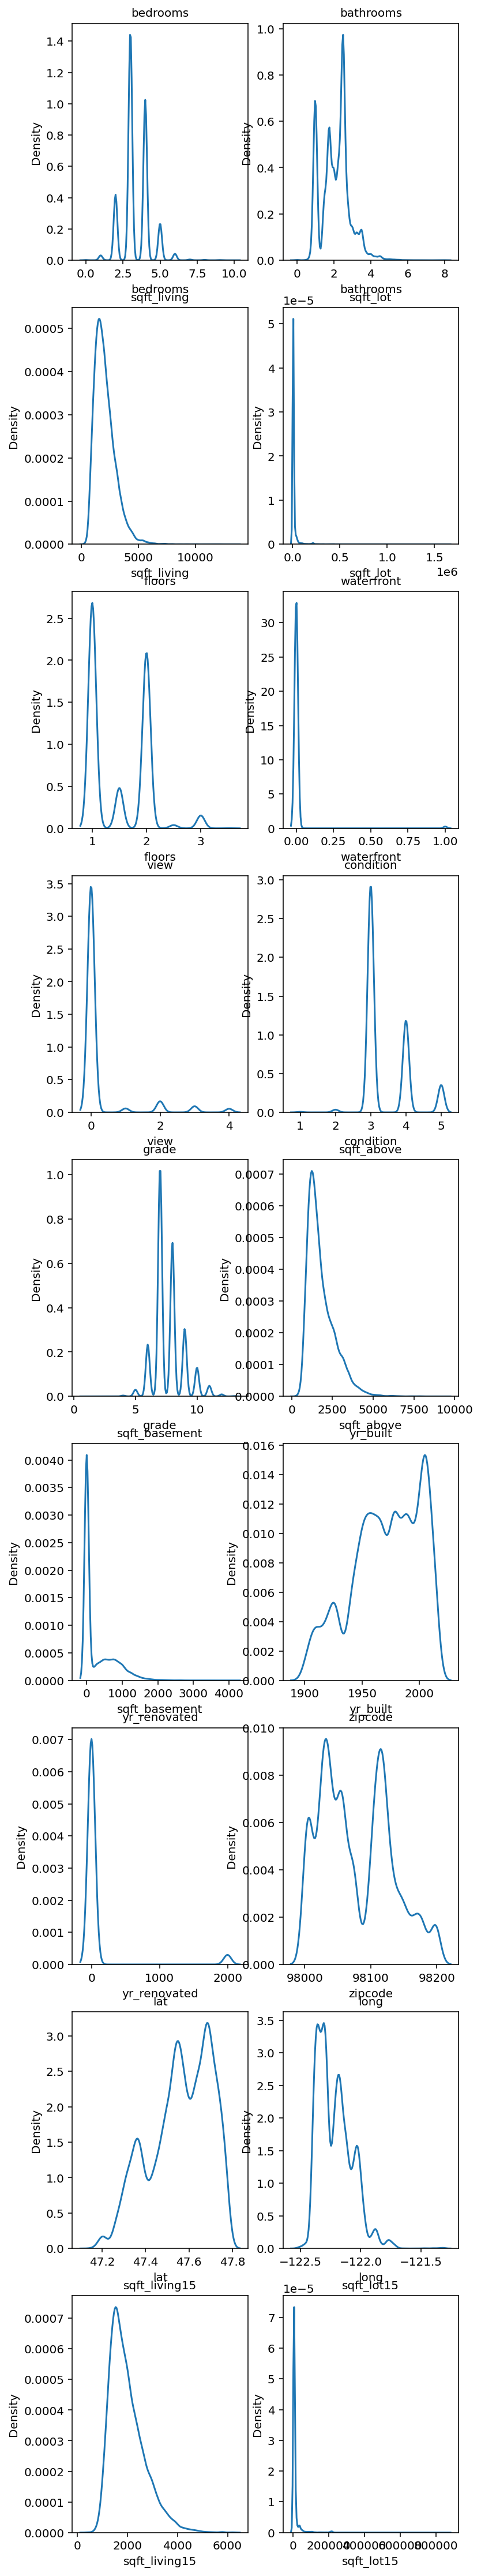

In [22]:
fig, ax = plt.df_testplots(9, 2, figsize=(6, 40))   # Í∞ÄÎ°úÏä§ÌÅ¨Î°§ ÎïåÎ¨∏Ïóê Í∑∏ÎûòÌîÑ ÌôïÏù∏Ïù¥ Î∂àÌé∏ÌïòÎã§Î©¥ figsizeÏùò xÍ∞íÏùÑ Ï°∞Ï†àÌï¥ Î≥¥ÏÑ∏Ïöî. 

# id Î≥ÄÏàò(count==0Ïù∏ Í≤ΩÏö∞)Îäî Ï†úÏô∏ÌïòÍ≥† Î∂ÑÌè¨Î•º ÌôïÏù∏Ìï©ÎãàÎã§.
count = 1
columns = df_train.columns
for row in range(9):
    for col in range(2):
        sns.kdeplot(df_train=df_train[columns[count]], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=10)
        count += 1
        if count == 19 :
            break

Í∑∏ÎûòÌîÑÏùò Î∂ÑÌè¨Î•º Î≥¥Î©¥ Ïñ¥Îñ§ Ï≤òÎ¶¨Î•º Ìï¥Ï£ºÎ©¥ Ï¢ãÏùÑÏßÄ Îñ†Ïò¨Î¶¥ Ïàò ÏûàÏäµÎãàÎã§.

ÏúÑ Í∑∏ÎûòÌîÑ Ï§ëÏóêÏÑúÎäî bedrooms, sqft_living, sqft_lot, sqft_above, sqft_basement, sqft_living15, sqft_lot15 Î≥ÄÏàòÍ∞Ä ÌïúÏ™ΩÏúºÎ°ú ÏπòÏö∞Ïπú Í≤ΩÌñ•ÏùÑ Î≥¥Ïù¥ÎäîÍµ∞Ïöî.

Ïù¥Î†áÍ≤å Ìïú Ï™ΩÏúºÎ°ú ÏπòÏö∞Ïπú Î∂ÑÌè¨Ïùò Í≤ΩÏö∞ÏóêÎäî Î°úÍ∑∏ Î≥ÄÌôò(log-scaling)ÏùÑ ÌÜµÌï¥ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨Î•º Ï†ïÍ∑úÎ∂ÑÌè¨Ïóê Í∞ÄÍπùÍ≤å ÎßåÎì§ Ïàò ÏûàÏäµÎãàÎã§. ÏûêÏÑ∏Ìïú Ïù¥Ïú†Îäî ÏïÑÎûòÏóêÏÑú Îã§Ïãú Îã§Î£®Í≥†, Ïö∞ÏÑ† Í≤∞Í≥ºÎ∂ÄÌÑ∞ ÏÇ¥Ìé¥Î¥ÖÏãúÎã§.

ÏïÑÎûòÏôÄ Í∞ôÏù¥ ÏπòÏö∞Ïπú Ïª¨ÎüºÎì§ÏùÑ skew_columns Î¶¨Ïä§Ìä∏ ÏïàÏóê Îã¥Í≥†, Î™®Îëê np.log1p()Î•º ÌôúÏö©Ìï¥ÏÑú Î°úÍ∑∏ Î≥ÄÌôòÏùÑ Ìï¥Ï£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§. numpy.log1p() Ìï®ÏàòÎäî ÏûÖÎ†• Î∞∞Ïó¥Ïùò Í∞Å ÏöîÏÜåÏóê ÎåÄÌï¥ ÏûêÏó∞Î°úÍ∑∏ log(1 + x)ÏùÑ Î∞òÌôòÌï¥ Ï£ºÎäî Ìï®ÏàòÏûÖÎãàÎã§.

In [23]:
skew_columns = ['bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_lot15', 'sqft_living15']

for c in skew_columns:
    df_train[c] = np.log1p(df_train[c].values)

print('Ïñçüí¢')

Ïñçüí¢


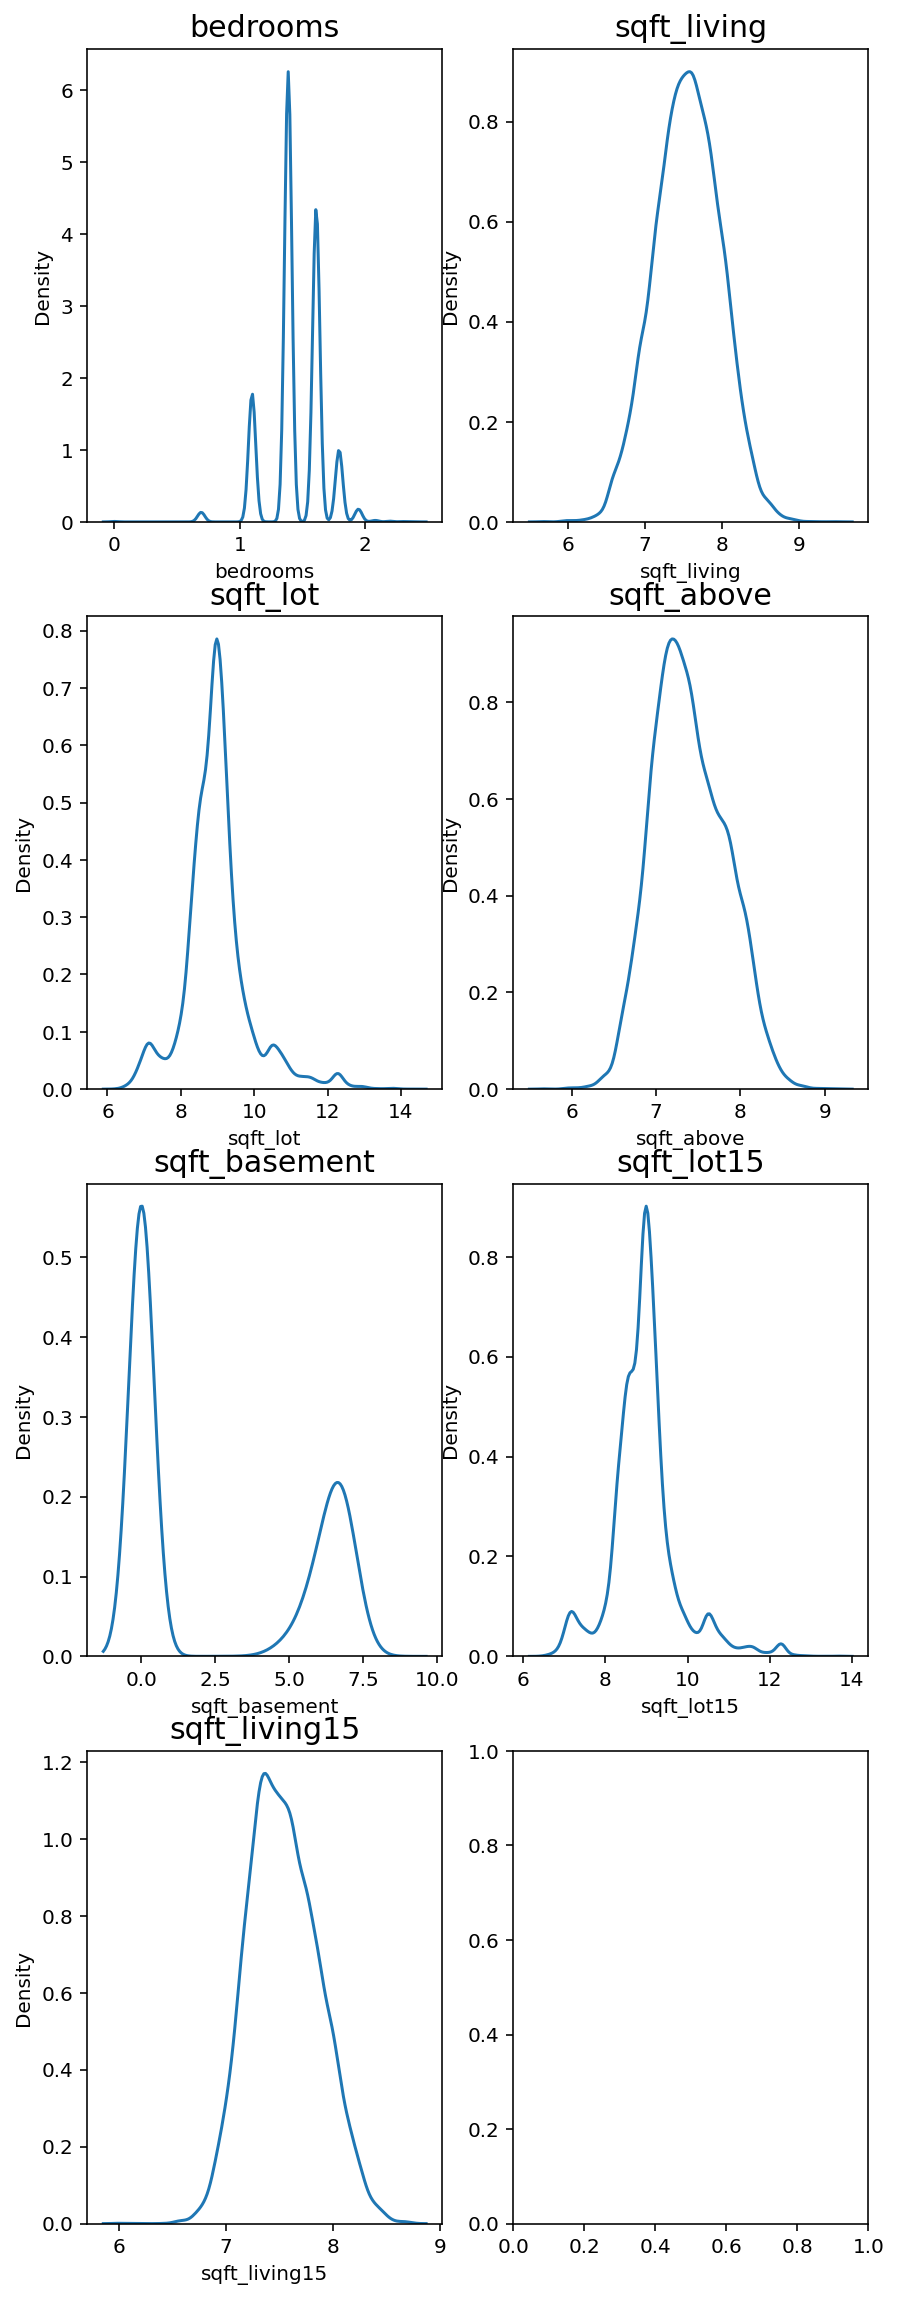

In [25]:
fig, ax = plt.df_testplots(4, 2, figsize=(7, 20))

count = 0
for row in range(4):
    for col in range(2):
        if count == 7:
            break
        sns.kdeplot(df_train=df_train[skew_columns[count]], ax=ax[row][col])
        ax[row][col].set_title(skew_columns[count], fontsize=15)
        count += 1

Í∑∏Î†áÎã§Î©¥ Ïôú Î°úÍ∑∏ Î≥ÄÌôòÏùÄ Î∂ÑÌè¨Ïùò ÏπòÏö∞Ïπ®ÏùÑ Ï§ÑÏñ¥Îì§Í≤å ÎßåÎìúÎäî Í±∏ÍπåÏöî?
Ïù¥Îäî Î°úÍ∑∏ Ìï®ÏàòÏùò ÌòïÌÉúÎ•º Î≥¥Î©¥ Ïïå Ïàò ÏûàÏäµÎãàÎã§. ÏïÑÎûòÏùò ÏùºÎ∞òÏ†ÅÏù∏ Î°úÍ∑∏ Ìï®ÏàòÎ•º ÏÇ¥Ìé¥Î¥ÖÏãúÎã§.

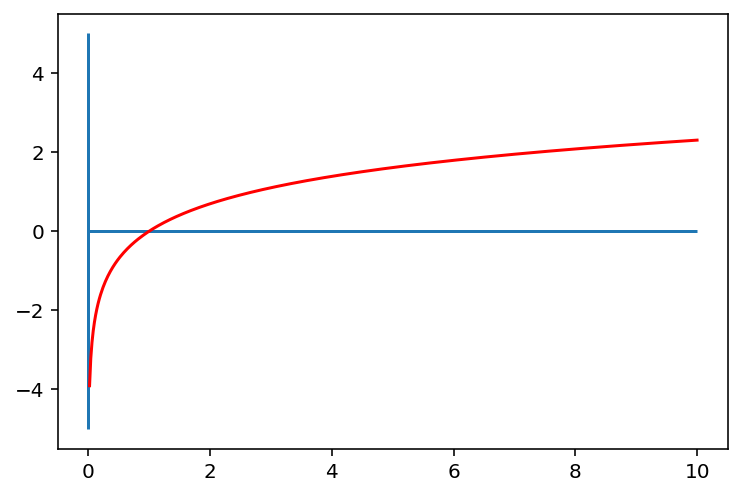

In [26]:
xx = np.linspace(0, 10, 500)
yy = np.log(xx)

plt.hlines(0, 0, 10)
plt.vlines(0, -5, 5)
plt.plot(xx, yy, c='r')
plt.show()

ÏúÑÏôÄ Í∞ôÏùÄ Î°úÍ∑∏ Ìï®ÏàòÏùò ÌäπÏßïÏùÄ Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§.

0 < x < 10<x<1 Î≤îÏúÑÏóêÏÑúÎäî Í∏∞Ïö∏Í∏∞Í∞Ä Îß§Ïö∞ Í∞ÄÌååÎ¶ÖÎãàÎã§. Ï¶â, xxÏùò Íµ¨Í∞ÑÏùÄ (0, 1)(0,1)Î°ú Îß§Ïö∞ ÏßßÏùÄ Î∞òÎ©¥, yyÏùò Íµ¨Í∞ÑÏùÄ (-/infty, 0)(‚àí‚àû,0)ÏúºÎ°ú Îß§Ïö∞ ÌÅΩÎãàÎã§.  
Îî∞ÎùºÏÑú 0Ïóê Í∞ÄÍπùÍ≤å Î™®Ïó¨ÏûàÎäî Í∞íÎì§Ïù¥ xxÎ°ú ÏûÖÎ†•ÎêòÎ©¥, Í∑∏ Ìï®ÏàòÍ∞íÏù∏ yy Í∞íÎì§ÏùÄ Îß§Ïö∞ ÌÅ∞ Î≤îÏúÑÎ°ú Î≤åÏñ¥ÏßÄÍ≤å Îê©ÎãàÎã§.  
Ï¶â, Î°úÍ∑∏ Ìï®ÏàòÎäî 0Ïóê Í∞ÄÍπåÏö¥ Í∞íÎì§Ïù¥ Ï°∞Î∞ÄÌïòÍ≤å Î™®Ïó¨ÏûàÎäî ÏûÖÎ†•Í∞íÏùÑ, ÎÑìÏùÄ Î≤îÏúÑÎ°ú ÌéºÏπ† Ïàò ÏûàÎäî ÌäπÏßïÏùÑ Í∞ÄÏßëÎãàÎã§.  
Î∞òÎ©¥, xxÍ∞íÏù¥ Ï†êÏ†ê Ïª§ÏßêÏóê Îî∞Îùº Î°úÍ∑∏ Ìï®ÏàòÏùò Í∏∞Ïö∏Í∏∞Îäî Í∏âÍ≤©Ìûà ÏûëÏïÑÏßëÎãàÎã§.  
Ïù¥Îäî Í≥ß ÌÅ∞ xxÍ∞íÎì§Ïóê ÎåÄÌï¥ÏÑúÎäî yyÍ∞íÏù¥ ÌÅ¨Í≤å Ï∞®Ïù¥ÎÇòÏßÄ ÏïäÍ≤å ÎêúÎã§Îäî ÎúªÏù¥Í≥†, Îî∞ÎùºÏÑú ÎÑìÏùÄ Î≤îÏúÑÎ•º Í∞ÄÏßÄÎäî xxÎ•º ÎπÑÍµêÏ†Å ÏûëÏùÄ yyÍ∞íÏùò Íµ¨Í∞Ñ ÎÇ¥Ïóê Î™®Ïù¥Í≤å ÌïòÎäî ÌäπÏßïÏùÑ Í∞ÄÏßëÎãàÎã§.  
ÏúÑÏôÄ Í∞ôÏùÄ ÌäπÏÑ± ÎïåÎ¨∏Ïóê Ìïú Ï™ΩÏúºÎ°ú Î™∞Î†§ÏûàÎäî Î∂ÑÌè¨Ïóê Î°úÍ∑∏ Î≥ÄÌôòÏùÑ Ï∑®ÌïòÍ≤å ÎêòÎ©¥ ÎÑìÍ≤å ÌçºÏßà Ïàò ÏûàÎäî Í≤ÉÏù¥Ï£†.  

Ïôú ÌïúÏ™ΩÏúºÎ°ú ÏπòÏö∞Ïπú Î∂ÑÌè¨Î•º Î°úÍ∑∏ Î≥ÄÌôòÏùÑ Ï∑®ÌïòÍ≤å ÎêòÎ©¥ Ï†ïÍ∑úÎ∂ÑÌè¨ Î™®ÏñëÏúºÎ°ú Í≥†Î•¥Í≤å Î∂ÑÌè¨ÌïòÍ≤å Îê† Ïàò ÏûàÎäîÏßÄ Ïù¥Ìï¥Í∞Ä ÎêòÏãúÎÇòÏöî?  

Í∑∏Î†áÎã§Î©¥ Ïö∞Î¶¨Í∞Ä ÎßûÏ∂îÏñ¥Ïïº Ìï† ÌÉÄÍ≤üÏù∏ ÏßëÏùò Í∞ÄÍ≤©, Ï¶â df_train[price]Ïùò Î∂ÑÌè¨Î•º Î°úÍ∑∏ Î≥ÄÌôòÌñàÏùÑ Îïå Í≤∞Í≥ºÎ•º Ïú†Ï∂îÌï¥Î¥ÖÏãúÎã§.  
ÏõêÎûò priceÏùò Î∂ÑÌè¨Îäî Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§.

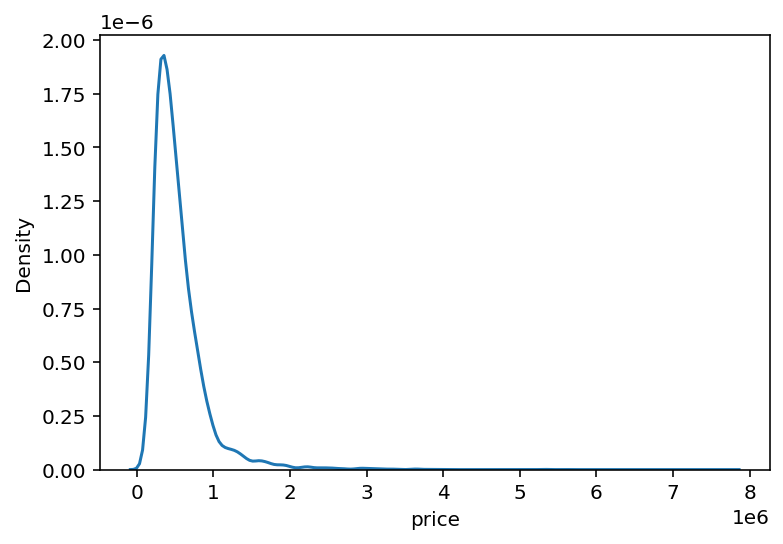

In [27]:
sns.kdeplot(y)
plt.show()

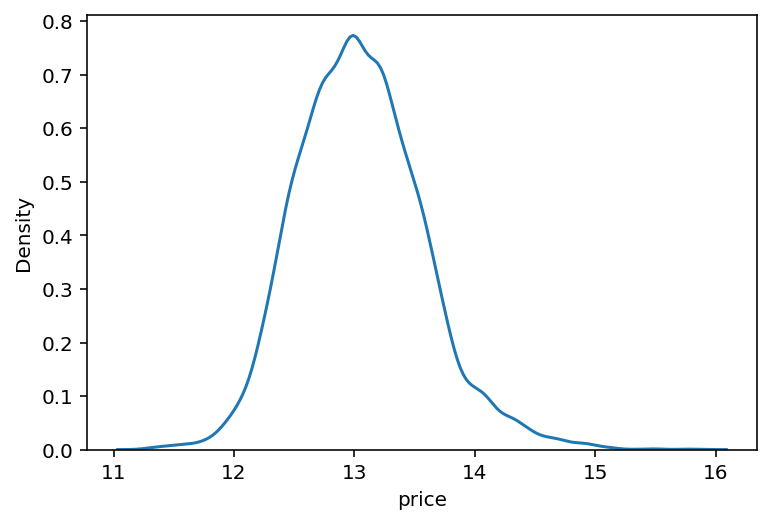

In [28]:
y_log_transformation = np.log1p(y)

sns.kdeplot(y_log_transformation)
plt.show()

In [29]:
df_test = df_train.iloc[train_len:, :]
x = df_train.iloc[:train_len, :]

print(x.shape)
print(df_test.shape)

(15035, 19)
(6555, 19)


### Î™®Îç∏ ÏÑ§Í≥Ñ

‚úì Î™®Îç∏ÎßÅ  
Ïù¥Ï†ú Î≥∏Í≤©Ï†ÅÏúºÎ°ú ÌïôÏäµÏãúÌÇ¨ Î™®Îç∏ÏùÑ Ï§ÄÎπÑÌï©ÎãàÎã§. Baseline Ïª§ÎÑêÏóêÏÑúÎäî Ïó¨Îü¨ Í∞ÄÏßÄ Î™®Îç∏ÏùÑ Ìï®Íªò ÏÇ¨Ïö©Ìï¥ÏÑú Í≤∞Í≥ºÎ•º ÏÑûÎäî, Î∏îÎ†åÎî©(blending) Ïù¥ÎùºÎäî Í∏∞Î≤ïÏùÑ ÌôúÏö©Ìï©ÎãàÎã§.  

Î∏îÎ†åÎî©Ïù¥ÎûÄ ÌïòÎÇòÏùò Í∞úÎ≥Ñ Î™®Îç∏ÏùÑ ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÏù¥ ÏïÑÎãàÎùº Îã§ÏñëÌïú Ïó¨Îü¨ Î™®Îç∏ÏùÑ Ï¢ÖÌï©ÌïòÏó¨ Í≤∞Í≥ºÎ•º ÏñªÎäî Í∏∞Î≤ïÏûÖÎãàÎã§.  
Î∏îÎ†åÎî©ÏùÄ ÏïôÏÉÅÎ∏î Í∏∞Î≤ïÏù¥ÎùºÍ≥† ÌïòÍ∏∞ÎèÑ ÌïòÎäîÎç∞Ïöî, ÏûêÏÑ∏Ìïú ÎÇ¥Ïö©ÏùÑ Îã§Ïùå Ìè¨Ïä§ÌåÖÏóêÏÑú ÏÇ¥Ïßù ÏùΩÏñ¥Î≥¥Í≤†ÏäµÎãàÎã§.

In [30]:
# Average Blending
gboost = GradientBoostingRegressor(random_state=2019)
xgboost = xgb.XGBRegressor(random_state=2019)
lightgbm = lgb.LGBMRegressor(random_state=2019)

models = [{'model':gboost, 'name':'GradientBoosting'}, {'model':xgboost, 'name':'XGBoost'},
          {'model':lightgbm, 'name':'LightGBM'}]

print('Ïñçüí¢')

Ïñçüí¢


In [31]:
# Cross Validation
def get_cv_score(models):
    kfold = KFold(n_splits=5).get_n_splits(x.values)
    for m in models:
        CV_score = np.mean(cross_val_score(m['model'], X=x.values, y=y, cv=kfold))
        print(f"Model: {m['name']}, CV score:{CV_score:.4f}")
print('Ïñçüí¢')

Ïñçüí¢


In [34]:
get_cv_score(models)

Model: GradientBoosting, CV score:0.8598
Model: XGBoost, CV score:0.8860
Model: LightGBM, CV score:0.8819


In [36]:
# Make df_testmission File
#cross_val_score() Ìï®ÏàòÎäî ÌöåÍ∑ÄÎ™®Îç∏ÏùÑ Ï†ÑÎã¨Ìï† Í≤ΩÏö∞ $R^2$ Ï†êÏàòÎ•º Î∞òÌôòÌï©ÎãàÎã§.

def AveragingBlending(models, x, y, df_test_x):
    for m in models : 
        m['model'].fit(x.values, y)
    
    predictions = np.column_stack([
        m['model'].predict(df_test_x.values) for m in models
    ])
    return np.mean(predictions, axis=1)

print('Ïñçüí¢')

Ïñçüí¢


In [37]:
y_pred = AveragingBlending(models, x, y, df_test)
print(len(y_pred))
y_pred

6555


array([1361676.91242777,  308900.55888961,  786583.53874638, ...,
       1693771.62246729,  415635.76190782,  341572.97685942])

In [42]:
df_testmission_path = 'C:/project/aiffel_exp/exp5_kaggle/sample_df_testmission.csv'
df_testmission = pd.read_csv(df_testmission_path)
df_testmission.head()

id   price
0  15035  100000
1  15036  100000
2  15037  100000
3  15038  100000
4  15039  100000

In [43]:
# idÏôÄ priceÎ°ú Íµ¨ÏÑ±Îêú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
result = pd.df_trainFrame({
    'id' : df_test_id, 
    'price' : y_pred
})

result.head()

id         price
0  15208  1.361677e+06
1  15209  3.089006e+05
2  15210  7.865835e+05
3  15211  2.143299e+05
4  15212  4.413795e+05

In [45]:
my_df_testmission_path = 'C:/project/aiffel_exp/exp5_kaggle/sample_df_testmission.csv'
result.to_csv(my_df_testmission_path, index=False)

print(my_df_testmission_path)

C:/project/aiffel_exp/exp5_kaggle/sample_submission.csv


### Ï∫êÍ∏ÄÏóê Ï†úÏ∂úÌïòÍ∏∞

### Îã§Ïãú Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑÌïòÍ∏∞

In [52]:
train_df_train_path = 'C:/project/aiffel_exp/exp5_kaggle/train.csv'
test_df_train_path = 'C:/project/aiffel_exp/exp5_kaggle/test.csv'

train = pd.read_csv(train_df_train_path)
test = pd.read_csv(test_df_train_path)

print('Ïñçüí¢')

Ïñçüí¢


In [53]:
# intÌòï Îç∞Ïù¥ÌÑ∞Î°ú Ï≤òÎ¶¨
train['date'] = train['date'].apply(lambda i: i[:6]).astype(int)
train.head()

id    date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0   0  201410  221900.0         3       1.00         1180      5650     1.0   
1   1  201502  180000.0         2       1.00          770     10000     1.0   
2   2  201502  510000.0         3       2.00         1680      8080     1.0   
3   3  201406  257500.0         3       2.25         1715      6819     2.0   
4   4  201501  291850.0         3       1.50         1060      9711     1.0   

   waterfront  view  ...  grade  sqft_above  sqft_basement  yr_built  \
0           0     0  ...      7        1180              0      1955   
1           0     0  ...      6         770              0      1933   
2           0     0  ...      8        1680              0      1987   
3           0     0  ...      7        1715              0      1995   
4           0     0  ...      7        1060              0      1963   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1             0    98028  47.7379 -122.233           2720        8062  
2             0    98074  47.6168 -122.045           1800        7503  
3             0    98003  47.3097 -122.327           2238        6819  
4             0    98198  47.4095 -122.315           1650        9711  

[5 rows x 21 columns]

In [54]:
# ÌÉÄÍ≤üÎç∞Ïù¥ÌÑ∞ Ïª¨Îüº Î≥ÄÏàòÏóê ÎÑ£Í≥† ÏÇ≠Ï†ú
y = train['price']
del train['price']

print(train.columns)

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [55]:
del train['id']

print(train.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [56]:
# test Îç∞Ïù¥ÌÑ∞ÎèÑ 
test['date'] = test['date'].apply(lambda i: i[:6]).astype(int)

del test['id']

print(test.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [57]:
y

0         221900.0
1         180000.0
2         510000.0
3         257500.0
4         291850.0
           ...    
15030     610685.0
15031    1007500.0
15032     360000.0
15033     400000.0
15034     325000.0
Name: price, Length: 15035, dtype: float64

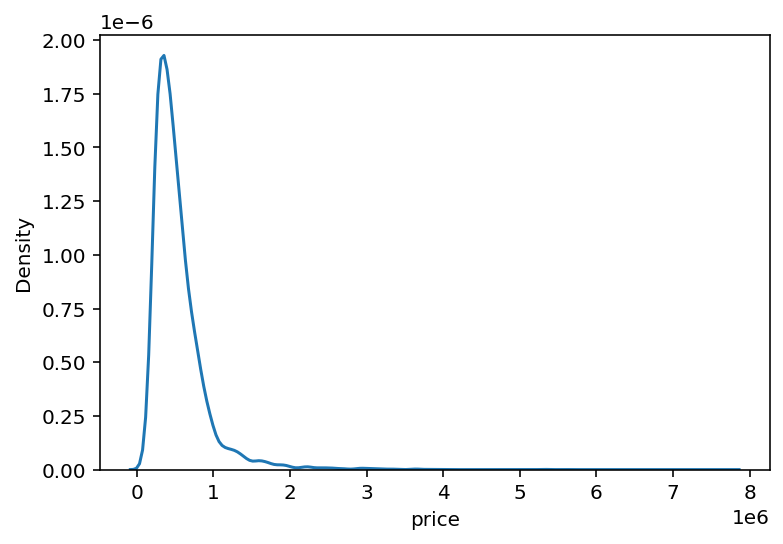

In [58]:
"""
seabornÏùò `kdeplot`ÏùÑ ÌôúÏö©Ìï¥ `y`Ïùò Î∂ÑÌè¨Î•º ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî!
"""
sns.kdeplot(y)
plt.show()

In [61]:
'''
yÎäî np.log1p() Ìï®ÏàòÎ•º ÌÜµÌï¥ Î°úÍ∑∏ Î≥ÄÌôòÏùÑ Ìï¥Ï£ºÍ≥†, 
ÎÇòÏ§ëÏóê Î™®Îç∏Ïù¥ Í∞íÏùÑ ÏòàÏ∏°Ìïú ÌõÑÏóê Îã§Ïãú np.expm1()ÏùÑ ÌôúÏö©Ìï¥ÏÑú ÎêòÎèåÎ¶¨Í≤†ÏäµÎãàÎã§. 
np.exp1m()ÏùÄ np.log1p()Í≥ºÎäî Î∞òÎåÄÎ°ú Í∞Å ÏõêÏÜå xÎßàÎã§ exp(x)-1Ïùò Í∞íÏùÑ Î∞òÌôòÌï¥ Ï§çÎãàÎã§.
'''
y = np.log1p(y)
y

0        12.309987
1        12.100718
2        13.142168
3        12.458779
4        12.583999
           ...    
15030    13.322338
15031    13.822984
15032    12.793862
15033    12.899222
15034    12.691584
Name: price, Length: 15035, dtype: float64

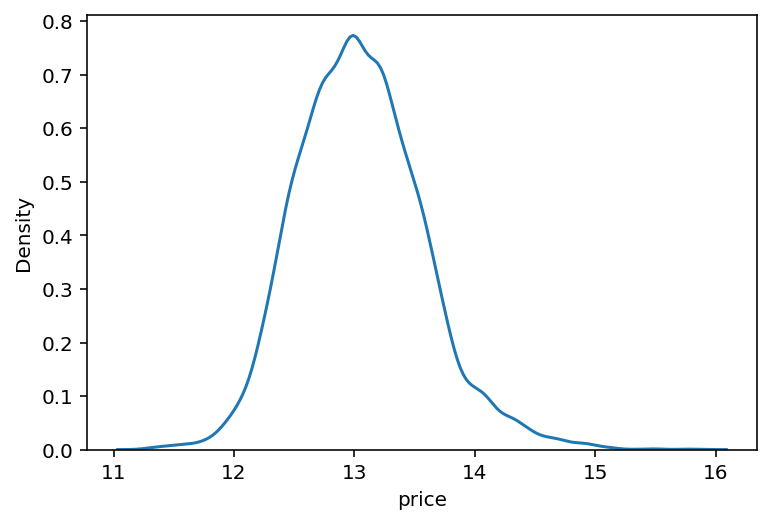

In [62]:
sns.kdeplot(y)
plt.show()

In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           15035 non-null  int32  
 1   bedrooms       15035 non-null  int64  
 2   bathrooms      15035 non-null  float64
 3   sqft_living    15035 non-null  int64  
 4   sqft_lot       15035 non-null  int64  
 5   floors         15035 non-null  float64
 6   waterfront     15035 non-null  int64  
 7   view           15035 non-null  int64  
 8   condition      15035 non-null  int64  
 9   grade          15035 non-null  int64  
 10  sqft_above     15035 non-null  int64  
 11  sqft_basement  15035 non-null  int64  
 12  yr_built       15035 non-null  int64  
 13  yr_renovated   15035 non-null  int64  
 14  zipcode        15035 non-null  int64  
 15  lat            15035 non-null  float64
 16  long           15035 non-null  float64
 17  sqft_living15  15035 non-null  int64  
 18  sqft_l

### Îã§ÏñëÌïú Ïã§ÌóòÏùÑ ÏúÑÌï¥ Ìï®Ïàò ÎßåÎì§Í∏∞

In [64]:
# RSME Í≥ÑÏÇ∞

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

print('Ïñçüí¢')

Ïñçüí¢


In [65]:
'''
ÎåÄÌöåÏóêÏÑú Ï†êÏàòÎ•º Îß§Í∏∞Îäî Í≤ÉÍ≥º Í∞ôÏùÄ ÌèâÍ∞Ä Ï≤ôÎèÑÏù∏ RMSEÎ•º Í≥ÑÏÇ∞ÌïòÍ∏∞ ÏúÑÌï¥ Îã§ÏùåÍ≥º Í∞ôÏùÄ Ìï®ÏàòÎ•º ÎßåÎì§Ïñ¥ÎÜìÍ≤†ÏäµÎãàÎã§.
Ìïú Í∞ÄÏßÄ Ï£ºÏùòÌï¥Ïïº Ìï† Í≤ÉÏùÄ, y_testÎÇò y_predÎäî ÏúÑÏóêÏÑú np.log1p()Î°ú Î≥ÄÌôòÏù¥ Îêú Í∞íÏù¥Í∏∞ ÎïåÎ¨∏Ïóê ÏõêÎûò Îç∞Ïù¥ÌÑ∞Ïùò Îã®ÏúÑÏóê ÎßûÍ≤å ÎêòÎèåÎ¶¨Í∏∞ ÏúÑÌï¥ np.expm1()ÏùÑ Ï∂îÍ∞ÄÌï¥Ïïº ÌïúÎã§Îäî Ï†êÏûÖÎãàÎã§.

expÎ°ú Îã§Ïãú Î≥ÄÌôòÌï¥ÏÑú mean_squared_errorÎ•º Í≥ÑÏÇ∞Ìïú Í∞íÏóê np.sqrtÎ•º Ï∑®ÌïòÎ©¥ RMSE Í∞íÏùÑ ÏñªÏùÑ Ïàò ÏûàÍ≤†Ï£†!
'''
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))

print('Ïñçüí¢')

Ïñçüí¢


In [66]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

print('Ïñçüí¢')

Ïñçüí¢


In [67]:
# random_stateÎäî Î™®Îç∏Ï¥àÍ∏∞ÌôîÎÇò Îç∞Ïù¥ÌÑ∞ÏÖã Íµ¨ÏÑ±Ïóê ÏÇ¨Ïö©ÎêòÎäî ÎûúÎç§ ÏãúÎìúÍ∞íÏûÖÎãàÎã§. 
#random_state=None    # Ïù¥Í≤å Ï¥àÍ∏∞Í∞íÏûÖÎãàÎã§. ÏïÑÎ¨¥Í≤ÉÎèÑ ÏßÄÏ†ïÌïòÏßÄ ÏïäÍ≥† NoneÏùÑ ÎÑòÍ≤®Ï£ºÎ©¥ Î™®Îç∏ ÎÇ¥Î∂ÄÏóêÏÑú ÏûÑÏùòÎ°ú ÏÑ†ÌÉùÌï©ÎãàÎã§.  
random_state=2020        # ÌïòÏßÄÎßå Ïö∞Î¶¨Îäî Ïù¥Î†áÍ≤å Í≥†Ï†ïÍ∞íÏùÑ ÏÑ∏ÌåÖÌï¥ ÎëêÍ≤†ÏäµÎãàÎã§. 

gboost = GradientBoostingRegressor(random_state=random_state)
xgboost = XGBRegressor(random_state=random_state)
lightgbm = LGBMRegressor(random_state=random_state)
rdforest = RandomForestRegressor(random_state=random_state)

models = [gboost, xgboost, lightgbm, rdforest]

print('Ïñçüí¢')

Ïñçüí¢


In [68]:
gboost.__class__.__name__

'GradientBoostingRegressor'

In [69]:
df = {}

for model in models:
    # Î™®Îç∏ Ïù¥Î¶Ñ ÌöçÎìù
    model_name = model.__class__.__name__

    # train, test Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÎ¶¨ - Ïó¨Í∏∞ÏóêÎèÑ random_stateÎ•º Í≥†Ï†ïÌï©ÎãàÎã§. 
    X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)

    # Î™®Îç∏ ÌïôÏäµ
    model.fit(X_train, y_train)
    
    # ÏòàÏ∏°
    y_pred = model.predict(X_test)

    # ÏòàÏ∏° Í≤∞Í≥ºÏùò rmseÍ∞í Ï†ÄÏû•
    df[model_name] = rmse(y_test, y_pred)
    
    # df_train frameÏóê Ï†ÄÏû•
    score_df = pd.df_trainFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)
    
df

{'GradientBoostingRegressor': 128360.19649691365,
 'XGBRegressor': 110318.6704088949,
 'LGBMRegressor': 111920.36735892233,
 'RandomForestRegressor': 125367.2973747959}

In [71]:
def get_scores(models, train, y):
    df = {}
    
    for model in models:
        model_name = model.__class__.__name__
        
        X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        df[model_name] = rmse(y_test, y_pred)
        score_df = pd.df_trainFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)
            
    return score_df

get_scores(models, train, y)

RMSE
GradientBoostingRegressor  128360.196497
RandomForestRegressor      125367.297375
LGBMRegressor              111920.367359
XGBRegressor               110318.670409

### ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù, Í∑∏Î¶¨Îìú ÌÉêÏÉâ

In [72]:
from sklearn.model_selection import GridSearchCV

print('Ïñçüí¢')

Ïñçüí¢


#### gridsearchCV?
* param_grid : ÌÉêÏÉâÌï† ÌååÎùºÎØ∏ÌÑ∞Ïùò Ï¢ÖÎ•ò (ÎîïÏÖîÎÑàÎ¶¨Î°ú ÏûÖÎ†•)
* coring : Î™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ ÌèâÍ∞ÄÌï† ÏßÄÌëú
* cv : cross validationÏùÑ ÏàòÌñâÌïòÍ∏∞ ÏúÑÌï¥ train Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÎÇòÎàÑÎäî Ï°∞Í∞ÅÏùò Í∞úÏàò
* verbose : Í∑∏Î¶¨Îìú ÌÉêÏÉâÏùÑ ÏßÑÌñâÌïòÎ©¥ÏÑú ÏßÑÌñâ Í≥ºÏ†ïÏùÑ Ï∂úÎ†•Ìï¥ÏÑú Î≥¥Ïó¨Ï§Ñ Î©îÏÑ∏ÏßÄÏùò Ïñë (Ïà´ÏûêÍ∞Ä ÌÅ¥ÏàòÎ°ù Îçî ÎßéÏùÄ Î©îÏÑ∏ÏßÄÎ•º Ï∂úÎ†•Ìï©ÎãàÎã§.)
* n_jobs : Í∑∏Î¶¨Îìú ÌÉêÏÉâÏùÑ ÏßÑÌñâÌïòÎ©¥ÏÑú ÏÇ¨Ïö©Ìï† CPUÏùò Í∞úÏàò

In [73]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [1, 10],
}

In [74]:
model = LGBMRegressor(random_state=random_state)

print('Ïñçüí¢')

Ïñçüí¢


In [75]:
grid_model = GridSearchCV(model, param_grid=param_grid, /
                        scoring='neg_mean_squared_error', /
                        cv=5, verbose=1, n_jobs=5)

grid_model.fit(train, y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=2020), n_jobs=5,
             param_grid={'max_depth': [1, 10], 'n_estimators': [50, 100]},
             scoring='neg_mean_squared_error', verbose=1)

In [76]:
#  Ïã§Ìóò Í≤∞Í≥º Ï†ÄÏû•
grid_model.cv_results_

{'mean_fit_time': array([0.04986663, 0.07380314, 0.13942671, 0.23417373]),
 'std_fit_time': array([0.00178379, 0.00302408, 0.00182795, 0.00212947]),
 'mean_score_time': array([0.00658245, 0.00837774, 0.0127665 , 0.02094374]),
 'std_score_time': array([0.00079784, 0.00079736, 0.00116318, 0.00089218]),
 'param_max_depth': masked_array(data=[1, 1, 10, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[50, 100, 50, 100],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1, 'n_estimators': 50},
  {'max_depth': 1, 'n_estimators': 100},
  {'max_depth': 10, 'n_estimators': 50},
  {'max_depth': 10, 'n_estimators': 100}],
 'split0_test_score': array([-0.0756974 , -0.05555652, -0.02885847, -0.02665428]),
 'split1_test_score': array([-0.07666447, -0.057876  , -0.03041465, -0.02795896]),
 'split2_test_score': array([-0.07354904

In [77]:
# Ïã§ÌóòÍ≤∞Í≥ºÏóêÏÑú ÏõêÌïòÎäî Í∞íÎßå Ï∂îÏ∂ú1
params = grid_model.cv_results_['params']
params

[{'max_depth': 1, 'n_estimators': 50},
 {'max_depth': 1, 'n_estimators': 100},
 {'max_depth': 10, 'n_estimators': 50},
 {'max_depth': 10, 'n_estimators': 100}]

In [78]:
# Ïã§ÌóòÍ≤∞Í≥ºÏóêÏÑú ÏõêÌïòÎäî Í∞íÎßå Ï∂îÏ∂ú2
score = grid_model.cv_results_['mean_test_score']
score

array([-0.07339447, -0.05502043, -0.02917734, -0.02702714])

In [79]:
# Ï∂îÏ∂úÌïú Í∞íÏùÑ ÌÖåÏù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏúºÎ°ú ÌÖåÏù¥Î∏îÌôî
results = pd.df_trainFrame(params)
results['score'] = score

results

max_depth  n_estimators     score
0          1            50 -0.073394
1          1           100 -0.055020
2         10            50 -0.029177
3         10           100 -0.027027

In [80]:
# RMSE Ï†êÏàò ÌôïÏù∏
results['RMSE'] = np.sqrt(-1 * results['score'])
results

max_depth  n_estimators     score      RMSE
0          1            50 -0.073394  0.270914
1          1           100 -0.055020  0.234564
2         10            50 -0.029177  0.170814
3         10           100 -0.027027  0.164399

Ïïó, ÌïòÏßÄÎßå ÏïÑÏßÅÎèÑ ÏúÑÏóêÏÑú Î≥¥ÏïòÎçò 10Îßå Îã®ÏúÑÏùò RMSEÏôÄÎäî Í∞íÏùò ÌÅ¨Í∏∞Í∞Ä ÏïÑÏ£º Îã§Î•∏ Í≤É Í∞ôÏäµÎãàÎã§.

Í∑∏ Ïù¥Ïú†Îäî priceÏóê ÏûàÏäµÎãàÎã§. ÏúÑÏóêÏÑú Ïö∞Î¶¨Îäî priceÏùò Î∂ÑÌè¨Í∞Ä ÌïúÏ™ΩÏúºÎ°ú ÏπòÏö∞Ï≥êÏ†∏ ÏûàÎäî Í≤ÉÏùÑ Î≥¥Í≥† log Î≥ÄÌôòÏùÑ ÌñàÏóàÏ£†.
Í∑∏ ÌõÑ RMSE Í∞íÏùÑ Í≥ÑÏÇ∞ÌïòÍ∏∞ ÏúÑÌïú Ìï®ÏàòÏóêÏÑúÎäî np.expm1 Ìï®ÏàòÎ•º ÌôúÏö©Ìï¥ Îã§Ïãú ÏõêÎûòÎåÄÎ°ú Î≥µÏõêÌïú ÌõÑ RMSE Í∞íÏùÑ Í≥ÑÏÇ∞ÌñàÏäµÎãàÎã§.

ÌïòÏßÄÎßå Í∑∏Î¶¨Îìú ÌÉêÏÉâÏùÑ ÌïòÎ©¥ÏÑúÎäî np.expm1()ÏúºÎ°ú Î≥ÄÌôòÌïòÎäî Í≥ºÏ†ïÏù¥ ÏóÜÏóàÍ∏∞ ÎïåÎ¨∏Ïóê log Î≥ÄÌôòÎêòÏñ¥ ÏûàÎäî price Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏÜêÏã§Ìï®ÏàòÍ∞íÏùÑ Í≥ÑÏÇ∞Ìïú Í≤ÉÏù¥Ï£†.
Îî∞ÎùºÏÑú ÏÇ¨Ïã§, ÏúÑÏùò Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏóê ÎÇòÌÉÄÎÇú Í∞íÏùÄ Ï†ïÌôïÌûà ÎßêÌïòÎ©¥ RMSEÍ∞Ä ÏïÑÎãàÎùº RMSLE, Ï¶â Root Mean Squared Log Error ÏûÖÎãàÎã§.
logÎ•º Ï∑®Ìïú Í∞íÏóêÏÑú RMSEÎ•º Íµ¨ÌñàÎã§Îäî ÎúªÏù¥Ï£†!

Ïù¥Ïóê ÎßûÍ≤å Ïª¨ÎüºÏùò Ïù¥Î¶ÑÏùÑ RMSLEÎ°ú Î≥ÄÌôòÌï¥ Ï£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§. ÌåêÎã§Ïä§ÏóêÏÑú Ïª¨ÎüºÏùò Ïù¥Î¶Ñ Î≥ÄÌôòÏùÄ renameÏúºÎ°ú Ìï† Ïàò ÏûàÏäµÎãàÎã§.

In [81]:
results = results.rename(columns={'RMSE': 'RMSLE'})
results

max_depth  n_estimators     score     RMSLE
0          1            50 -0.073394  0.270914
1          1           100 -0.055020  0.234564
2         10            50 -0.029177  0.170814
3         10           100 -0.027027  0.164399

In [82]:
results = results.sort_values('RMSLE')
results

max_depth  n_estimators     score     RMSLE
3         10           100 -0.027027  0.164399
2         10            50 -0.029177  0.170814
1          1           100 -0.055020  0.234564
0          1            50 -0.073394  0.270914

In [83]:
"""
Îã§ÏùåÍ≥º Í∞ôÏùÄ Í≥ºÏ†ïÏùÑ ÏßÑÌñâÌï† Ïàò ÏûàÎäî `my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)` Ìï®ÏàòÎ•º Íµ¨ÌòÑÌï¥ Î≥¥ÏÑ∏Ïöî.

1. GridSearchCV Î™®Îç∏Î°ú `model`ÏùÑ Ï¥àÍ∏∞ÌôîÌï©ÎãàÎã§.
2. Î™®Îç∏ÏùÑ fitting Ìï©ÎãàÎã§.
3. params, scoreÏóê Í∞Å Ï°∞Ìï©Ïóê ÎåÄÌïú Í≤∞Í≥ºÎ•º Ï†ÄÏû•Ìï©ÎãàÎã§. 
4. Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏùÑ ÏÉùÏÑ±ÌïòÍ≥†, RMSLE Í∞íÏùÑ Ï∂îÍ∞ÄÌïú ÌõÑ Ï†êÏàòÍ∞Ä ÎÜíÏùÄ ÏàúÏÑúÎ°ú Ï†ïÎ†¨Ìïú `results`Î•º Î∞òÌôòÌï©ÎãàÎã§.
"""
def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
    # GridSearchCV Î™®Îç∏Î°ú Ï¥àÍ∏∞Ìôî
    grid_model = GridSearchCV(model, param_grid=param_grid, scoring='neg_mean_squared_error', /
                              cv=5, verbose=verbose, n_jobs=n_jobs)
    
    # Î™®Îç∏ fitting
    grid_model.fit(train, y)

    # Í≤∞Í≥ºÍ∞í Ï†ÄÏû•
    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']
    
    # Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
    results = pd.df_trainFrame(params)
    results['score'] = score
    
    # RMSLE Í∞í Í≥ÑÏÇ∞ ÌõÑ Ï†ïÎ†¨
    results['RMSLE'] = np.sqrt(-1 * results['score'])
    results = results.sort_values('RMSLE')

    return results

In [84]:
# Í∞ÄÏû• Ï¢ãÏùÄ Ï°∞Ìï© Ï≤¥ÌÅ¨
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [1, 10],
}

model = LGBMRegressor(random_state=random_state)
my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


max_depth  n_estimators     score     RMSLE
3         10           100 -0.027027  0.164399
2         10            50 -0.029177  0.170814
1          1           100 -0.055020  0.234564
0          1            50 -0.073394  0.270914

In [92]:
# Ìï¥Îãπ Ï°∞Ìï©ÏúºÎ°ú Íµ¨ÏÑ±Ìïú Î™®Îç∏Í≥º ÌïôÏäµ ÌõÑ ÏòàÏ∏°
model = LGBMRegressor(max_depth=10, n_estimators=100, random_state=random_state)
model.fit(train, y)
prediction = model.predict(test)
prediction

array([14.11202067, 12.71849347, 13.52092457, ..., 14.42214958,
       12.9088143 , 12.69894979])

In [93]:
# ÏòàÏ∏°Í≤∞Í≥ºÏóê np.expm1`ÏùÑ ÏîåÏõåÏÑú Î¶¨Ïä§ÏºÄÏùº
prediction = np.expm1(prediction)
prediction

array([1345155.15609376,  333864.49141891,  744838.89652063, ...,
       1834255.12502788,  403855.25797189,  327402.87855805])

In [95]:
df_testmission_path = 'C:/project/aiffel_exp/exp5_kaggle/sample_df_testmission.csv'
df_testmission = pd.read_csv(df_testmission_path)
df_testmission.head()

id         price
0  15208  1.361677e+06
1  15209  3.089006e+05
2  15210  7.865835e+05
3  15211  2.143299e+05
4  15212  4.413795e+05

In [100]:
df_testmission['price'] = prediction
df_testmission.head()

id         price
0  15208  1.345155e+06
1  15209  3.338645e+05
2  15210  7.448389e+05
3  15211  1.974053e+05
4  15212  4.289361e+05

In [102]:
'''
Îã®, ÏïûÏúºÎ°úÎäî ÎßéÏùÄ Ïã§ÌóòÏù¥ ÏûàÏùÑ ÏòàÏ†ïÏù¥Îãà ÌååÏùº Ïù¥Î¶ÑÏóê Î™®Îç∏Ïùò Ï¢ÖÎ•òÏôÄ ÏúÑÏóêÏÑú ÌôïÏù∏ÌñàÎçò 
RMSLE Í∞íÏùÑ ÎÑ£Ïñ¥Ï£ºÎ©¥ Ï†úÏ∂ú ÌååÏùºÎì§Ïù¥ ÍπîÎÅîÌïòÍ≤å Í¥ÄÎ¶¨Îê† Í≤ÉÏûÖÎãàÎã§!
'''
df_testmission_csv_path = '{}/df_testmission_{}_RMSLE_{}.csv'.format('C:/project/aiffel_exp/exp5_kaggle', 'lgbm', '0.164399')
df_testmission.to_csv(df_testmission_csv_path, index=False)
print(df_testmission_csv_path)

C:/project/aiffel_exp/exp5_kaggle/submission_lgbm_RMSLE_0.164399.csv


In [105]:
"""
ÏïÑÎûòÏùò Í≥ºÏ†ïÏùÑ ÏàòÌñâÌïòÎäî `save_df_testmission(model, train, y, test, model_name, rmsle)` Ìï®ÏàòÎ•º Íµ¨ÌòÑÌï¥ Ï£ºÏÑ∏Ïöî.
1. Î™®Îç∏ÏùÑ `train`, `y`Î°ú ÌïôÏäµÏãúÌÇµÎãàÎã§.
2. `test`Ïóê ÎåÄÌï¥ ÏòàÏ∏°Ìï©ÎãàÎã§.
3. ÏòàÏ∏°Í∞íÏùÑ `np.expm1`ÏúºÎ°ú Î≥ÄÌôòÌïòÍ≥†, `df_testmission_model_name_RMSLE_100000.csv` ÌòïÌÉúÏùò `csv` ÌååÏùºÏùÑ Ï†ÄÏû•Ìï©ÎãàÎã§.
"""

def save_df_testmission(model, train, y, test, model_name, rmsle=None):
    model.fit(train, y)
    prediction = model.predict(test)
    prediction = np.expm1(prediction)
    df_testmission_path = 'C:/project/aiffel_exp/exp5_kaggle/sample_df_testmission.csv'
    df_testmission = pd.read_csv(df_testmission_path)
    df_testmission['price'] = prediction
    df_testmission_csv_path = '{}/df_testmission_{}_RMSLE_{}.csv'.format('C:/project/aiffel_exp/exp5_kaggle', model_name, rmsle)
    df_testmission.to_csv(df_testmission_csv_path, index=False)
    print('{} saved!'.format(df_testmission_csv_path))

## ÌîÑÎ°úÏ†ùÌä∏ : This is your playground! LeaderboardÎ•º Ï†ïÎ≥µÌï¥ Ï£ºÏÑ∏Ïöî!


#### ÌäúÎãùÌï¥Î≥º Ïàò ÏûàÎäî Î™®Îç∏ ÌÅ¥ÎûòÏä§ Ïù∏Ïûê
ÎåÄÌëúÏ†ÅÏúºÎ°ú ÏûêÏ£º ÌäúÎãùÌïòÎäî lightgbm ÎùºÏù¥Î∏åÎü¨Î¶¨Ïùò Ïù∏ÏûêÎäî Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§.

* max_depth : ÏùòÏÇ¨ Í≤∞Ï†ï ÎÇòÎ¨¥Ïùò ÍπäÏù¥, Ï†ïÏàò ÏÇ¨Ïö©
* learning_rate : Ìïú Ïä§ÌÖùÏóê Ïù¥ÎèôÌïòÎäî ÏñëÏùÑ Í≤∞Ï†ïÌïòÎäî ÌååÎùºÎØ∏ÌÑ∞, Î≥¥ÌÜµ 0.0001~0.1 ÏÇ¨Ïù¥Ïùò Ïã§Ïàò ÏÇ¨Ïö©
* n_estimators : ÏÇ¨Ïö©ÌïòÎäî Í∞úÎ≥Ñ Î™®Îç∏Ïùò Í∞úÏàò, Î≥¥ÌÜµ 50~100 Ïù¥ÏÉÅÏùò Ï†ïÏàò ÏÇ¨Ïö©
* num_leaves : ÌïòÎÇòÏùò LightGBM Ìä∏Î¶¨Í∞Ä Í∞ÄÏßà Ïàò ÏûàÎäî ÏµúÎåÄ ÏûéÏùò Ïàò
* boosting_type : Î∂ÄÏä§ÌåÖ Î∞©Ïãù, gbdt, rf Îì±Ïùò Î¨∏ÏûêÏó¥ ÏûÖÎ†•

### 0. Î£®Î∏åÎ¶≠

* Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨, Î™®Îç∏ÌïôÏäµ, ÏòàÏ∏°Ïùò Ï†ÑÏ≤¥ Í≥ºÏ†ïÏùÑ Í±∞Ï≥ê Ï∫êÍ∏Ä df_testmissionÍπåÏßÄ Ï†ÑÍ≥ºÏ†ïÏù¥ ÏÑ±Í≥µÏ†ÅÏúºÎ°ú ÏßÑÌñâÎêòÏóàÎäîÍ∞Ä?
* Ï†úÏ∂úÎêú ÎÖ∏Ìä∏Î∂ÅÏù¥ Ï∫êÍ∏Ä Ïª§ÎÑêÎ°ú ÏÇ¨Ïö©Îê† Ïàò ÏûàÏùÑ ÎßåÌÅº Ï†ÑÏ≤òÎ¶¨, ÌïôÏäµ, ÏµúÏ†ÅÌôî ÏßÑÌñâ Í≥ºÏ†ïÏù¥ Ï≤¥Í≥ÑÏ†ÅÏúºÎ°ú Í∏∞Ïà†ÎêòÏóàÎäîÍ∞Ä?
* Îã§ÏñëÌïú ÌîºÏ≤ò ÏóîÏßÄÎãàÏñ¥ÎßÅÍ≥º ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù Îì±Ïùò ÏµúÏ†ÅÌôî Í∏∞Î≤ïÏùÑ ÌÜµÌï¥ Ï∫êÍ∏Ä Î¶¨ÎçîÎ≥¥ÎìúÏùò Private score Í∏∞Ï§Ä 110000 Ïù¥ÌïòÏùò Ï†êÏàòÎ•º ÏñªÏóàÎäîÍ∞Ä?

### Ï∂îÍ∞Ä ÌïôÏäµÏûêÎ£å

* Part 1. Introduction to Ensemble Learning  
https://df_testinium.github.io/introduction-to-ensemble-1/#:~:text=%EC%95%99%EC%83%81%EB%B8%94(Ensemble)%20%ED%95%99%EC%8A%B5%EC%9D%80%20%EC%97%AC%EB%9F%AC,%EB%A5%BC%20%EA%B0%80%EC%A7%80%EA%B3%A0%20%EC%9D%B4%ED%95%B4%ED%95%98%EB%A9%B4%20%EC%A2%8B%EC%8A%B5%EB%8B%88%EB%8B%A4.
* Í≤∞Ï†ïÍ≥ÑÏàò R squared  
https://ltlkodae.tistory.com/19